##### Importando as bibliotecas necessárias

In [204]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict, train_test_split, learning_curve
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np

##### Importando o dataset que será utilizado

##### Foram utilizadas funcões como info(), describe() e value_counts() para analisar como os dados estão distribuidos

In [205]:
data = pd.read_csv('iris_original.csv')
data.head()

,petal_length,petal_width,sepal_length,sepal_width,species
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa
4,1.4,0.2,5.0,3.6,setosa


#### Analisando os dados mais a fundo

#### Com um agrupamento podemos observar que as pétalas diferenciam melhores as flores uma das outras, enquanto as sépalas são muito similares
##### Por isso vamos utilizar apenas as características das pétalas para classificar as flores

In [206]:
group = pd.DataFrame(data.groupby('species')[['petal_length','petal_width','sepal_length','sepal_width']].mean())
group

,petal_length,petal_width,sepal_length,sepal_width
species,,,,
setosa,1.462,0.246,5.006,3.428
versicolor,4.260,1.326,5.936,2.770
virginica,5.552,2.026,6.588,2.974


#### gráfico que expressa a difença entra cada flor, acredito que teremos uma grande acurácia

In [207]:
px.scatter(data, x='petal_length', y='petal_width', color='species')

##  Primeiros passos para classificação

In [208]:
x_iris = data[['petal_length','petal_width']] # Definindo as características
y_iris = data['species'] # Definindo o atributo a ser classificado

In [209]:
knn = KNeighborsClassifier(n_neighbors=3) # Criando o KNN com K=3
y_pred = cross_val_predict(knn, x_iris,y_iris,cv=10) # #Criando a cross_validation
matriz_cv = confusion_matrix(y_iris,y_pred) # Criando uma matriz de confusão para visualizar os erros e acertos
matriz_cv

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]])

<Axes: >

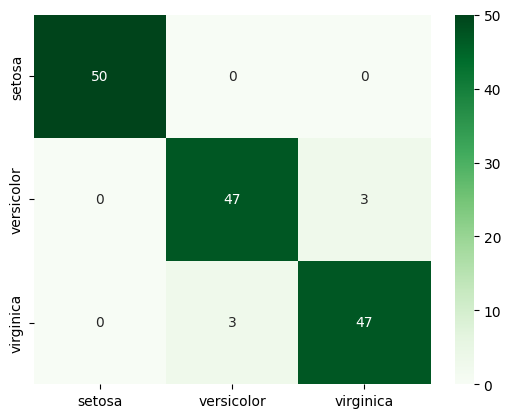

In [210]:
lbl1_cross = ['setosa', 'versicolor', 'virginica']
lbl2_cross = ['setosa', 'versicolor', 'virginica']
sns.heatmap(matriz_cv, cmap='Greens', xticklabels=lbl1_cross,yticklabels=lbl2_cross, annot=True) # gráfico que expressa melhor a matriz de confusão

### Analisando a precisão do modelo

In [211]:
report = classification_report(y_iris,y_pred,output_dict=True) #output_dict=True, transorma a matriz de confusão em um dicionário
df_report = pd.DataFrame(report)
df_report

,setosa,versicolor,virginica,accuracy,macro avg,weighted avg
precision,1.0,0.94,0.94,0.96,0.96,0.96
recall,1.0,0.94,0.94,0.96,0.96,0.96
f1-score,1.0,0.94,0.94,0.96,0.96,0.96
support,50.0,50.00,50.00,0.96,150.00,150.00


### Nosso modelo possui 96% de acurácia, o que é considerado muito bom

In [212]:
accuracy_score(y_iris,y_pred) 

0.96

### Agora vamos aplicar o método holdout

In [213]:
x_train, x_test, y_train, y_test = train_test_split(x_iris,y_iris,test_size=0.3,random_state=42)

In [214]:
knn_ht = KNeighborsClassifier(n_neighbors=3)
knn_ht.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [215]:
y_pred_ht = knn_ht.predict(x_test)

<Axes: >

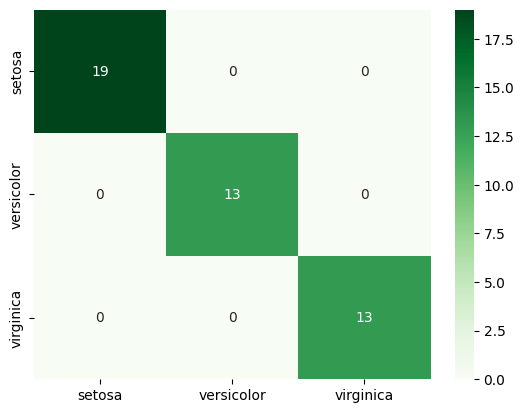

In [216]:
matriz_ht = confusion_matrix(y_test,y_pred_ht)
sns.heatmap(matriz_ht, annot=True, cmap='Greens', xticklabels=lbl1_cross,yticklabels=lbl2_cross)

In [ ]:
from sklearn.model_selection import learning_curve

In [218]:
train_sizes, train_scores, test_scores = learning_curve(knn_ht, x_iris, y_iris, scoring='accuracy', random_state=28)

In [219]:
df_curva_aprendizado = pd.DataFrame({
    "Tamanho do Conjunto de Treino": np.concatenate([train_sizes, train_sizes]),
    "Acurácia": np.concatenate([np.mean(train_scores, axis=1), np.mean(test_scores, axis=1)]),
    "Tipo": ["Treino"] * len(train_sizes) + ["Validação"] * len(train_sizes)
})

In [220]:
px.line(df_curva_aprendizado, x="Tamanho do Conjunto de Treino", y="Acurácia", color="Tipo",
              title="Curva de Aprendizado", markers=True, template="plotly_dark")

### Aplicando para um dataset maior

##### Como o método holdout obteve melhor acurácia, utilizaremos ele para testar o nosso dataset melhor

In [221]:
data_maior = pd.read_csv('iris_extended.csv')

data_maior

,species,elevation,soil_type,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area,sepal_aspect_ratio,...,sepal_to_petal_length_ratio,sepal_to_petal_width_ratio,sepal_petal_length_diff,sepal_petal_width_diff,petal_curvature_mm,petal_texture_trichomes_per_mm2,leaf_area_cm2,sepal_area_sqrt,petal_area_sqrt,area_ratios
0,setosa,161.8,sandy,5.16,3.41,1.64,0.26,17.5956,0.4264,1.513196,...,3.146341,13.115385,3.52,3.15,5.33,18.33,53.21,4.194711,0.652993,41.265478
1,setosa,291.4,clay,5.48,4.05,1.53,0.37,22.1940,0.5661,1.353086,...,3.581699,10.945946,3.95,3.68,5.90,20.45,52.53,4.711051,0.752396,39.205087
2,setosa,144.3,sandy,5.10,2.80,1.47,0.38,14.2800,0.5586,1.821429,...,3.469388,7.368421,3.63,2.42,5.66,24.62,50.25,3.778889,0.747395,25.563910
3,setosa,114.6,clay,4.64,3.44,1.53,0.17,15.9616,0.2601,1.348837,...,3.032680,20.235294,3.11,3.27,4.51,22.91,50.85,3.995197,0.510000,61.367166
4,setosa,110.9,loamy,4.85,2.87,1.23,0.26,13.9195,0.3198,1.689895,...,3.943089,11.038462,3.62,2.61,4.03,21.56,40.57,3.730885,0.565509,43.525641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,virginica,268.8,loamy,5.36,2.51,5.16,1.93,13.4536,9.9588,2.135458,...,1.038760,1.300518,0.20,0.58,11.61,11.52,59.46,3.667915,3.155757,1.350926
1196,virginica,125.4,clay,7.49,3.06,7.68,2.17,22.9194,16.6656,2.447712,...,0.975260,1.410138,-0.19,0.89,13.85,6.99,77.12,4.787421,4.082352,1.375252
1197,virginica,73.6,clay,6.79,3.25,4.72,2.26,22.0675,10.6672,2.089231,...,1.438559,1.438053,2.07,0.99,13.13,9.16,74.39,4.697606,3.266068,2.068725
1198,virginica,239.6,sandy,6.38,2.24,5.30,1.71,14.2912,9.0630,2.848214,...,1.203774,1.309942,1.08,0.53,11.01,6.46,73.90,3.780370,3.010482,1.576873


In [222]:
data_maior = data_maior[['species','petal_length','petal_width','petal_area']]

In [223]:
x_hte = data_maior[['petal_length','petal_width','petal_area']]
y_hte = data_maior['species']

In [224]:
x_train, x_test, y_train, y_test = train_test_split(x_hte,y_hte,test_size=0.3,random_state=42)

In [225]:
knn_hte = KNeighborsClassifier(n_neighbors=1)
knn_hte.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [226]:
y_pred_hte = knn_hte.predict(x_hte)

<Axes: >

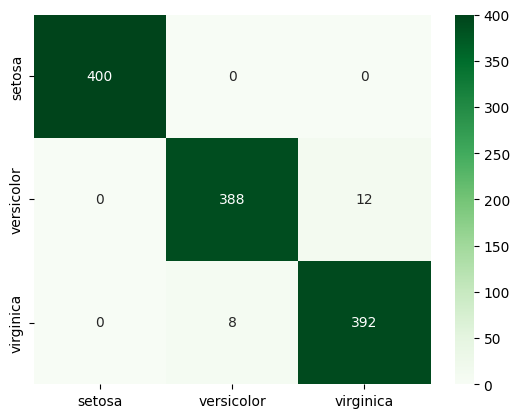

In [227]:
matriz_hte = confusion_matrix(y_hte,y_pred_hte)
sns.heatmap(matriz_hte, annot=True, cmap='Greens',fmt='d', xticklabels=lbl1_cross,yticklabels=lbl2_cross)

In [228]:
acuracia = accuracy_score(y_hte,y_pred_hte)
acuracia

0.9833333333333333